#Общая информация

Традиционно набор данных MNIST применяется для старта в освоении машинного обучения и компьютерного зрения.


В качестве альтернативного набора, также, достаточно часто применяется  набор данных **Fashion MNIST**. Подобно MNIST изображения одежды в Fashion MNIST представляют собой двумерные массивы 28х28, где значения в каждой ячейке могут быть в интервале [0, 255]. Метки — массив целых чисел, где каждое значение в интервале [0, 9]. Каждая метка соответствует одному из классов: футболка; шорты; свитер; платье; плащ; сандали; рубашка; кроссовок; сумка; ботинок.


Оба набора данных достаточно малы, поэтому часто используются для проверки корректности работы алгоритма, тестирования и отладки кода.


Основная цель лабораторной работы – знакомство с набором данных Fashion MNIST. Лабораторная работа основана на материалах, представленных на официальном сайте https://www.tensorflow.org/. Полная версия материалу доступна по ссылке: https://www.tensorflow.org/tutorials/keras/classification?hl=ru


# Простая классификация изображений одежды


Руководство использует [tf.keras](https://www.tensorflow.org/guide/keras), высокоуровневый API для построения и обучения моделей в TensorFlow.



In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


Загрузка датасета [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). Датасет содержит 70,000 монохромных изображений в 10 категориях. На каждом изображении содержится по одному предмету одежды в низком разрешении (28 на 28 пикселей):

| Метка (Label)  | Класс  | Class |
|:------------- |:---------------| :-------------|
| 0 |Футболки / сверху |  T-shirt/top    |
| 1 |  Брюки       |  Trouser      |
| 2 |    Свитер     |    Pullover    |
| 3 |   Платье      |   Dress     |
| 4 |    Пальто     |   Coat     |
| 5 |    Сандаль     |  Sandal      |
| 6 |   Рубашка      |   Shirt     |
| 7 |    Кроссовок     |    Sneaker    |
| 8 |     Сумка    |    Bag    |
| 9 |       Ботильоны |    Ankle boot    |



In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Загрузка датасета возвращает четыре массива NumPy:

Массивы train_images и train_labels являются тренировочным сетом — данными, на которых модель будет обучаться.
Модель тестируется на проверочном сете, а именно массивах test_images и test_labels.
Изображения являются 28х28 массивами NumPy, где значение пикселей варьируется от 0 до 255. Метки - это массив целых чисел от 0 до 9. Они соответствуют классам одежды изображенной на картинках.

Каждому изображению соответствует единственная метка. Так как названия классов не включены в датасет, сохраним их тут для дальнейшего использования при построении изображений:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Познакомимся с данными

Используя метод **shape** мы видим, что в тренировочном датасете 60,000 изображений, каждое размером 28 x 28 пикселей:

In [ ]:
train_images.shape

(60000, 28, 28)

Соответственно, в тренировочном сете 60,000 меток:

In [ ]:
len(train_labels)

60000

Каждая метка это целое число от 0 до 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проверочный сет содержит 10,000 изображений, каждое - также 28 на 28 пикселей:

In [ ]:
test_images.shape

(10000, 28, 28)

И в проверочном сете - ровно 10,000 меток:

In [ ]:
len(test_labels)

10000

# Предобработка данных

Данные должны быть предобработаны перед обучением нейросети. Если вы посмотрите на первое изображение в тренировочном сете вы увидите, что значения пикселей находятся в диапазоне от 0 до 255:

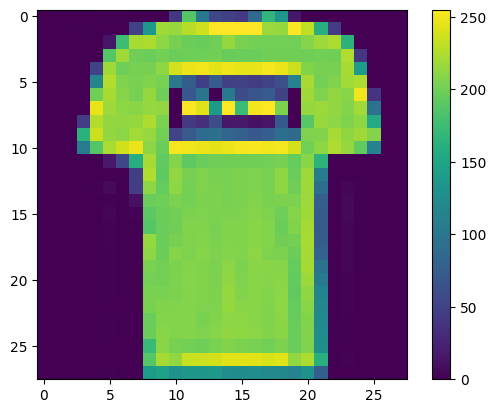

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Мы масштабируем эти значения к диапазону от 0 до 1 перед тем как применять данные для обучения нейросети. Для этого нужно разделить значения на 255.


Важно, чтобы тренировочный сет и проверочный сет были предобработаны одинаково:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Чтобы убедиться, что данные в правильном формате и мы готовы построить и обучить нейросеть, выведем на экран первые 25 изображений из тренировочного сета и отобразим под ними наименования их классов:

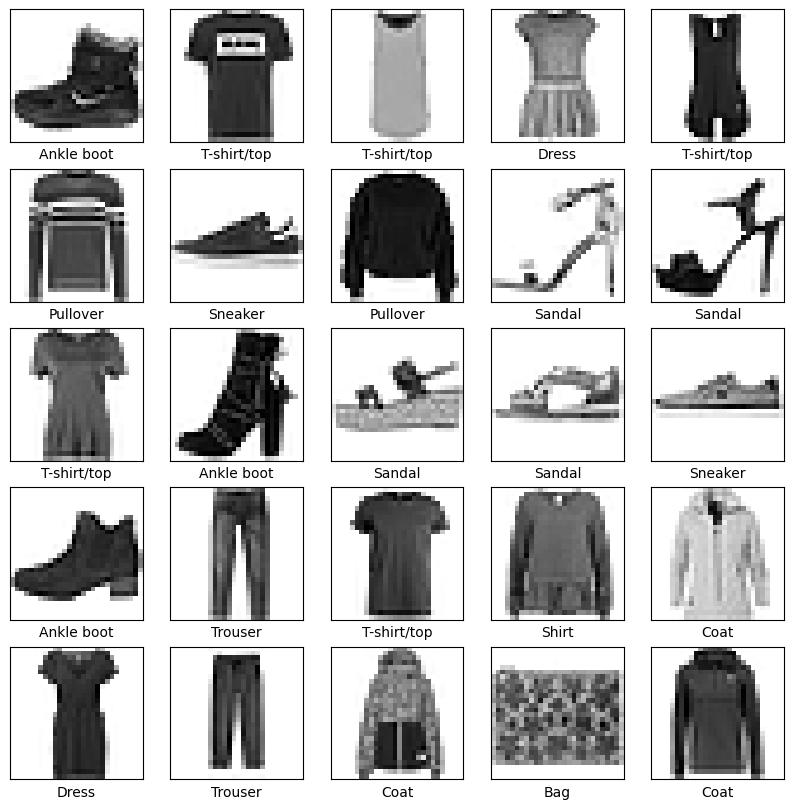

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Построение модели нейронной сети

### Настройте слои

Базовым строительным блоком нейронной сети является слой.


Слои извлекают образы из данных, которые в них подаются.

Большая часть глубокого обучения состоит из соединения в последовательность простых слоев. Большинство слоев, таких как tf.keras.layers.Dense, имеют параметры, которые настраиваются во время обучения.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Первый слой этой сети - tf.keras.layers.Flatten, преобразует формат изображения из двумерного массива (28 на 28 пикселей) в одномерный (размерностью 28 * 28 = 784 пикселя). Слой извлекает строки пикселей из изображения и выстраивает их в один ряд. Этот слой не имеет параметров для обучения; он только переформатирует данные.

После разложения пикселей, нейросеть содержит два слоя tf.keras.layers.Dense. Это полносвязные нейронные слои. Первый Dense слой состоит из 128 узлов (или нейронов). Второй (и последний) 10-узловой softmax слой возвращает массив из 10 вероятностных оценок дающих в сумме 1. Каждый узел содержит оценку указывающую вероятность принадлежности изображения к одному из 10 классов.

# Скомпилируйте модель
Прежде чем модель будет готова для обучения, нам нужно указать еще несколько параметров. Они добавляются на шаге compile модели:

*   Функция потерь (Loss function) — измеряет точность модели во время обучения. Мы хотим минимизировать эту функцию чтоб "направить" модель в верном направлении.
*   Оптимизатор (Optimizer) — показывает каким образом обновляется модель на основе входных данных и функции потерь.
* Метрики (Metrics) — используются для мониторинга тренировки и тестирования модели. Наш пример использует метрику accuracy равную доле правильно классифицированных изображений.





In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучите модель

Обучение модели нейронной сети требует выполнения следующих шагов::

1. Подайте тренировочный данные в модель. В этом примере тренировочные данные это массивы train_images и train_labels.
2. Модель учится ассоциировать изображения с правильными классами.
3. Мы просим модель сделать прогнозы для проверочных данных, в этом примере массив test_images. Мы проверяем, соответствуют ли предсказанные классы меткам из массива test_labels.
Для начала обучения, вызовите метод model.fit, который называется так, поскольку "тренирует (fits)" модель на тренировочных данных:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5052 - accuracy: 0.8221
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3773 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3394 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3158 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2984 - accuracy: 0.8887
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2818 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2714 - accuracy: 0.8982
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2577 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2512 - accuracy: 0.9056
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

В процессе обучения модели отображаются метрики потери (loss) и точности (accuracy). Эта модель достигает на тренировочных данных точности равной приблизительно 0.88 (88%).


# Оценка точности
Далее, сравните какую точность модель покажет на проверчном датасете:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

313/313 - 1s - loss: 0.3351 - accuracy: 0.8853 - 697ms/epoch - 2ms/step

Точность на проверочных данных: 0.8852999806404114


Полученная на проверочном сете точность оказалась немного ниже, чем на тренировочном. Этот разрыв между точностью на тренировке и тесте является примером переобучения (overfitting) . Переобучение возникает, когда модель машинного обучения показывает на новых данных худший результат, чем на тех, на которых она обучалась.

## Сделайте предсказания
Теперь, когда модель обучена, мы можем использовать ее чтобы сделать предсказания по поводу нескольких изображений:

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Здесь полученная модель предсказала класс одежды для каждого изображения в проверочном датасете. Давайте посмотрим на первое предсказание:

In [ ]:
predictions[0]

array([1.40008815e-05, 4.86060570e-09, 4.38061765e-09, 2.52407406e-09,
       1.35310484e-06, 6.17004873e-04, 1.32761181e-06, 1.04087014e-02,
       3.53406222e-07, 9.88957226e-01], dtype=float32)

Прогноз представляет из себя массив из 10 чисел. Они описывают "уверенность" (confidence) модели в том, насколько изображение соответствует каждому из 10 разных видов одежды. Мы можем посмотреть какой метке соответствует максимальное значение:

In [ ]:
np.argmax(predictions[0])

9

Модель полагает, что на первой картинке изображен ботинок (ankle boot), или class_names[9]. Проверка показывает, что классификация верна:

In [ ]:
test_labels[0]

9

Мы можем построить график, чтобы взглянуть на полный набор из 10 предсказаний классов.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Давайте посмотрим на нулевое изображение, предсказание и массив предсказаний.

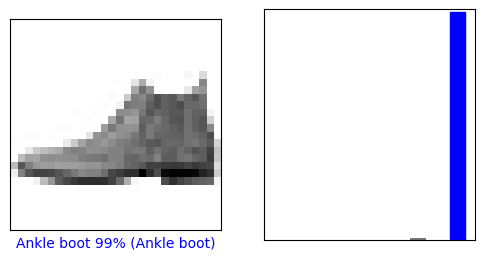

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

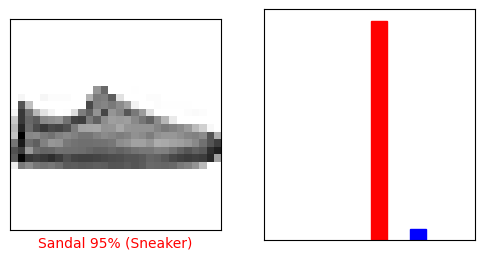

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Давайте посмотрим несколько изображений с их прогнозами. Цвет верных предсказаний синий, а неверных - красный. Число это процент уверенности (от 100) для предсказанной метки. Отметим, что модель может ошибаться даже если она очень уверена.

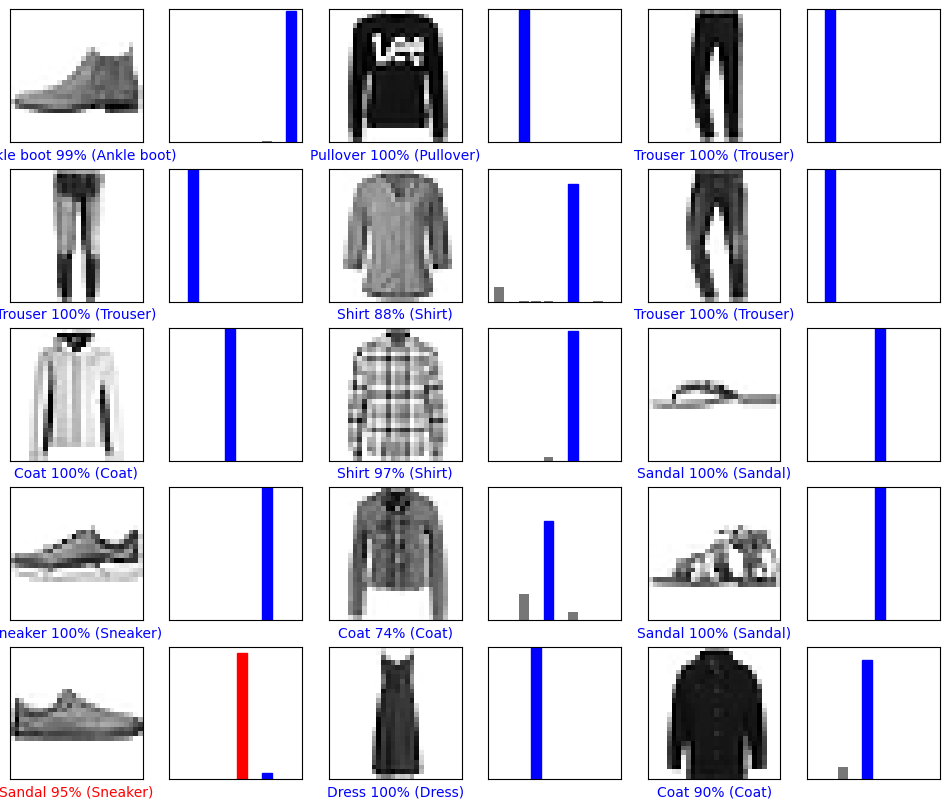

In [ ]:
# Отображаем первые X тестовых изображений, их предсказанную и настоящую метки.
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Наконец, используем обученную модель для предсказания класса на одном изображении.

In [ ]:
# Берем одну картинку из проверочного сета.
img = test_images[0]

print(img.shape)

(28, 28)


Модели tf.keras оптимизированы для предсказаний на пакетах (batch) данных, или на множестве примеров сразу. Таким образом, даже если мы используем всего 1 картинку, нам все равно необходимо добавить ее в список:

In [ ]:
# Добавляем изображение в пакет данных, состоящий только из одного элемента.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Сейчас предскажем правильную метку для изображения:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[1.4000869e-05 4.8606057e-09 4.3806256e-09 2.5240789e-09 1.3531035e-06
  6.1700394e-04 1.3276104e-06 1.0408701e-02 3.5340622e-07 9.8895723e-01]]


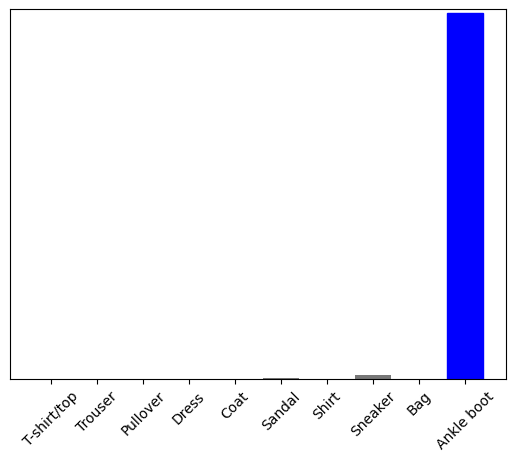

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9

И, как и ранее, модель предсказывает класс 9.

# Задание
Сфотографируйте элемент своей одежды (например, ботинок), добавьте код для предобработки изображений, попробуйте определить класс предмета одежды с помощью обученной нейронной сети.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


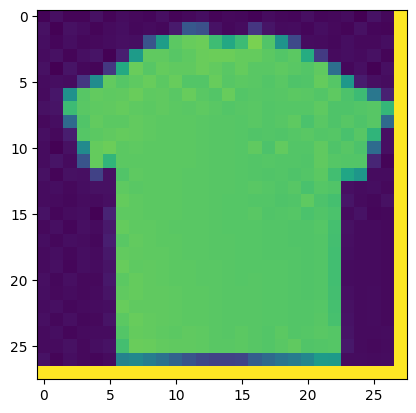

In [ ]:
import cv2
import scipy.misc
import matplotlib.pyplot as plt
img=cv2.imread("/gdrive/My Drive/1/TS.jpg", cv2.IMREAD_UNCHANGED)
resolution = (28, 28)
img = cv2.resize(img, resolution)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_data = (255.0-img.reshape(-1))/255
m = img_data.reshape(28,28)
plt.imshow(img_data.reshape(28,28))

In [ ]:
img = (np.expand_dims(m,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[3.7654549e-01 4.0515626e-04 2.9846767e-01 4.6552642e-04 2.3004815e-03
  2.7725291e-09 4.9644623e-02 7.2998288e-11 2.7217108e-01 6.2686296e-09]]


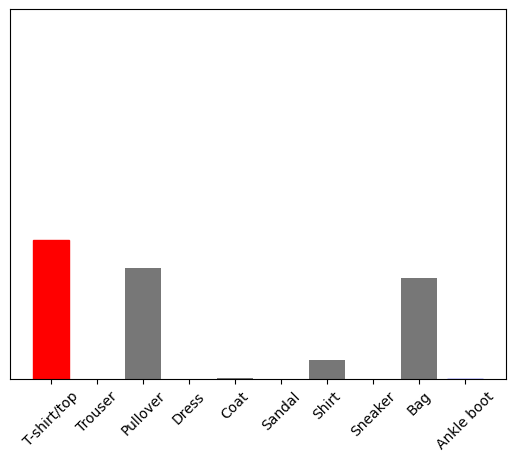

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
class_names[np.argmax(predictions_single[0])]

'T-shirt/top'